In [285]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('energydata_complete.csv')

In [286]:
a =   df['T2'].reset_index()
b = df['T6'].reset_index()
merge = pd.merge(a, b)

In [287]:
# Q12
# From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) 
# and the temperature outside the building (y = T6).
# What is the R^2 value in two d.p.?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = merge['T2']
y = merge['T6'] 

x = x.to_numpy()
x = x.reshape(-1, 1)



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score( y_test,y_pred )
print('R2 Score is: ', r2)

R2 Score is:  0.6385443715749319


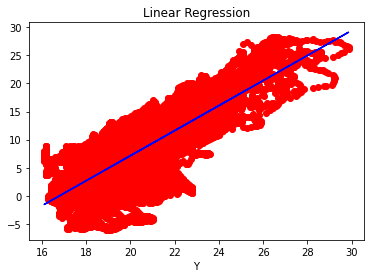

In [288]:
plt.scatter(x, y, color = 'red')
plt.plot(x,model.predict(x) , color = 'blue')
plt.title('Linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.show()

In [289]:
# Q13, Q14, Q15, Q16

# Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”].
# The target variable is “Appliances”.
# Use a 70-30 train-test set split with a random state of 42 (for reproducibility). 
# Run a multiple linear regression using the training set 
# and evaluate your model on the test set. Answer the following questions:

# What is the Mean Absolute Error (in two decimal places)?
columns = ['date', 'lights']
df.drop(columns = columns, axis = 1, inplace = True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


scaler = MinMaxScaler()
features_df = df.drop(columns=['Appliances'])
target_df = df['Appliances'].to_numpy()
target_df = target_df.reshape(-1,1)


n_features = pd.DataFrame(scaler.fit_transform(features_df))
n_target = pd.DataFrame(scaler.fit_transform(target_df))


x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(n_features,n_target, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train_1,y_train_1)


pred = linear_model.predict(x_test_1)

mae = mean_absolute_error(y_test_1, pred)
rss = np.sum(np.square(y_test_1 - pred))
rmse = np.sqrt(mean_squared_error(y_test_1, pred))
r2 = r2_score(y_test_1, pred)

print('Mean Abolute Error: ', round(mae, 2))
print('Residual Sum of Squares: ', round(rss, 2))
print('Root Mean Squared Error: ', round(rmse, 3))
print('Coefficient of Determinaton: ', round(r2, 2))


Mean Abolute Error:  0.05
Residual Sum of Squares:  0    45.34
dtype: float64
Root Mean Squared Error:  0.088
Coefficient of Determinaton:  0.15


In [290]:
# Helper function to calculate the weights 

def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [291]:
# Q17
# Obtain the feature weights from your linear model above. 
# Which features have the lowest and highest weights respectively?
def get_linear_model_weights_df(linear_model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(linear_model.coef_.T.reshape(26,), feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weight = get_linear_model_weights_df(linear_model, features_df, 'Linear_Model_Weight')
# print(linear_model_weight)
linear_model_weight.min(), linear_model_weight.max()
print('The lowest weight is: rv2')
print('The highest weight is: rv1', )



The lowest weight is: rv2
The highest weight is: rv1


In [292]:
# Q18
# Train a ridge regression model with an alpha value of 0.4. 
# Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.4)
ridge_model.fit(x_train_1, y_train_1)
ridge_pred = ridge_model.predict(x_test_1)

ridge_rmse = np.sqrt(mean_squared_error(y_test_1, ridge_pred))
print('Root Mean Squared Error: ', round(ridge_rmse, 3))

print('NO!, THERE IS NO CHANGE IN THE RMSE COMPARED TO THE PREVIOUS')

Root Mean Squared Error:  0.088
NO!, THERE IS NO CHANGE IN THE RMSE COMPARED TO THE PREVIOUS


In [293]:
# Q19 , Q20 
# Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it.
#  How many of the features have non-zero feature weights?
# What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

from sklearn.linear_model import Lasso 

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(x_train_1, y_train_1)
lasso_pred = lasso_model.predict(x_test_1)

lasso_model_weight = get_weights_df(lasso_model, features_df, 'Lasso_Model_Weight')
# print(lasso_model_weight)
print('FOUR (4) FEATURES HAVE NON-ZERO FEATURE WEIGHTS')

lasso_rmse = np.sqrt(mean_squared_error(y_test_1, lasso_pred))
print('Root Mean Squared Error: ', round(lasso_rmse, 3))




FOUR (4) FEATURES HAVE NON-ZERO FEATURE WEIGHTS
Root Mean Squared Error:  0.094
